# Machine Learning

### Датасет: [HTRU2](https://archive.ics.uci.edu/ml/datasets/HTRU2) описывает выборку кандидатов в пульсары

Датасет предназначен для построения модели машинного обучения, которая по входным параметрам, определит кандидата на пульсар, для дальнейшего, более глубокого изучения.

Датасет содержит **17 898** примеров:
* **16 259** ложных примеров - это радиочастотные помехи (RFI) и шум
* **1 639** реальных примеров - это излучения пульсаров

Информация об атрибутах:
* **mean_IP** - cреднее значение интегрированного профиля
* **deviation_IP** - стандартное отклонение интегрированного профиля
* **excess_IP** - лишний эксцесс интегрированного профиля
* **skewness_IP** - асимметрия интегрированного профиля
* **mean_DM-SNR** - cреднее значение DM-SNR кривой
* **deviation_DM-SNR** - стандартное отклонение DM-SNR кривой
* **excess_DM-SNR** - лишний эксцесс DM-SNR кривой
* **skewness_DM-SNR** - асимметрия DM-SNR кривой
* **class** - класс объекта: излучение пульсара = 1, помехи и шум = 0

## Готовим данные

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [58]:
data = pd.read_csv('../dataset/HTRU_2/HTRU_2.csv', sep = ',', engine = 'python')

In [59]:
type(data)

pandas.core.frame.DataFrame

In [60]:
data

,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
...,...,...,...,...,...,...,...,...,...
17892,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17893,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17894,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17895,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [61]:
print(data)

         140.5625  55.68378214  -0.234571412  -0.699648398  3.199832776  \
0      102.507812    58.882430      0.465318     -0.515088     1.677258   
1      103.015625    39.341649      0.323328      1.051164     3.121237   
2      136.750000    57.178449     -0.068415     -0.636238     3.642977   
3       88.726562    40.672225      0.600866      1.123492     1.178930   
4       93.570312    46.698114      0.531905      0.416721     1.636288   
...           ...          ...           ...           ...          ...   
17892  136.429688    59.847421     -0.187846     -0.738123     1.296823   
17893  122.554688    49.485605      0.127978      0.323061    16.409699   
17894  119.335938    59.935939      0.159363     -0.743025    21.430602   
17895  114.507812    53.902400      0.201161     -0.024789     1.946488   
17896   57.062500    85.797340      1.406391      0.089520   188.306020   

       19.11042633  7.975531794  74.24222492  0  
0        14.860146    10.576487   127.393580  0  

In [62]:
data.columns = [u'mean_IP', u'deviation_IP', u'excess_IP',u'skewness_IP', u'mean_DM-SNR',
                u'deviation_DM-SNR', u'excess_DM-SNR', u'skewness_DM-SNR', u'class']

In [63]:
data.head()

,mean_IP,deviation_IP,excess_IP,skewness_IP,mean_DM-SNR,deviation_DM-SNR,excess_DM-SNR,skewness_DM-SNR,class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [9]:
data.tail()

,meanIP,deviationIP,excessIP,skewnessIP,meanDM-SNR,deviationDM-SNR,excessDM-SNR,skewnessDM-SNR,class
17892,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17893,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17894,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17895,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17896,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


In [10]:
print(data.shape)
print(data.columns)

(17897, 9)
Index(['meanIP', 'deviationIP', 'excessIP', 'skewnessIP', 'meanDM-SNR',
       'deviationDM-SNR', 'excessDM-SNR', 'skewnessDM-SNR', 'class'],
      dtype='object')


In [11]:
data.index

RangeIndex(start=0, stop=17897, step=1)

In [16]:
data.at[2, 'deviation_IP']

57.17844874

In [17]:
data['excess_IP']

0        0.465318
1        0.323328
2       -0.068415
3        0.600866
4        0.531905
           ...   
17892   -0.187846
17893    0.127978
17894    0.159363
17895    0.201161
17896    1.406391
Name: excess_IP, Length: 17897, dtype: float64

In [18]:
data['excess_IP'][2]

-0.068414638

In [19]:
data['class'].dtype.name

'int64'

In [20]:
type(data['excess_IP'][3])

numpy.float64

In [21]:
type(data['deviation_IP'])

pandas.core.series.Series

In [22]:
data[['excess_IP', 'class']].head()

,excess_IP,class
0,0.465318,0
1,0.323328,0
2,-0.068415,0
3,0.600866,0
4,0.531905,0


In [23]:
data.describe()

,mean_IP,deviation_IP,excess_IP,skewness_IP,mean_DM-SNR,deviation_DM-SNR,excess_DM-SNR,skewness_DM-SNR,class
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.00000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419,0.09158
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270,0.28844
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.00000
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119,0.00000
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996,0.00000
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905,0.00000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.00000


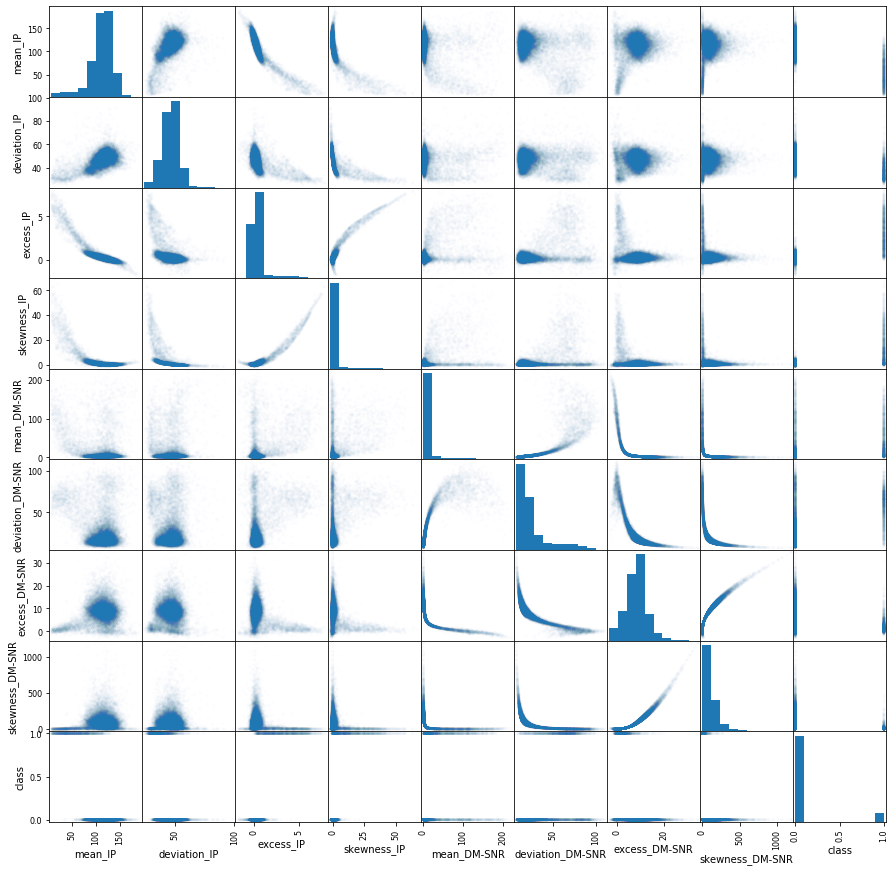

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (15, 15))
pass

In [25]:
data.corr()

,mean_IP,deviation_IP,excess_IP,skewness_IP,mean_DM-SNR,deviation_DM-SNR,excess_DM-SNR,skewness_DM-SNR,class
mean_IP,1.000000,0.547099,-0.873899,-0.738780,-0.298832,-0.307005,0.234345,0.144057,-0.673187
deviation_IP,0.547099,1.000000,-0.521418,-0.539792,0.006893,-0.047606,0.029436,0.027714,-0.363704
excess_IP,-0.873899,-0.521418,1.000000,0.945730,0.414362,0.432873,-0.341216,-0.214505,0.791592
skewness_IP,-0.738780,-0.539792,0.945730,1.000000,0.412052,0.415135,-0.328846,-0.204790,0.709526
mean_DM-SNR,-0.298832,0.006893,0.414362,0.412052,1.000000,0.796554,-0.615974,-0.354276,0.400873
deviation_DM-SNR,-0.307005,-0.047606,0.432873,0.415135,0.796554,1.000000,-0.809791,-0.575809,0.491532
excess_DM-SNR,0.234345,0.029436,-0.341216,-0.328846,-0.615974,-0.809791,1.000000,0.923744,-0.390819
skewness_DM-SNR,0.144057,0.027714,-0.214505,-0.204790,-0.354276,-0.575809,0.923744,1.000000,-0.259123
class,-0.673187,-0.363704,0.791592,0.709526,0.400873,0.491532,-0.390819,-0.259123,1.000000


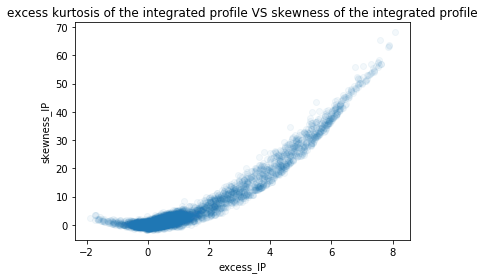

In [30]:
plt.plot(data['excess_IP'], data['skewness_IP'], 'o', alpha = 0.05)
plt.xlabel('excess_IP')
plt.ylabel('skewness_IP')
plt.title('excess kurtosis of the integrated profile VS skewness of the integrated profile')
pass

In [31]:
data['class'] == 0

0        True
1        True
2        True
3        True
4        True
         ... 
17892    True
17893    True
17894    True
17895    True
17896    True
Name: class, Length: 17897, dtype: bool

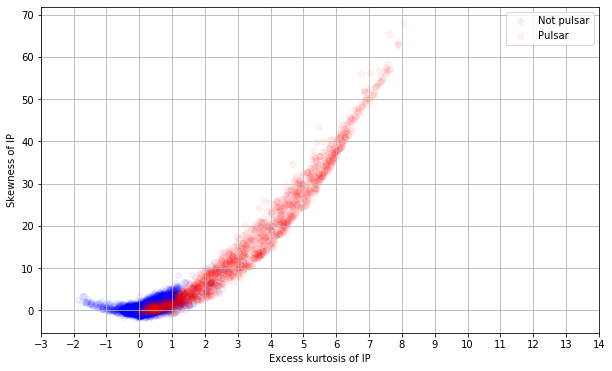

In [37]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['class'] == 0]['excess_IP'],
            data[data['class'] == 0]['skewness_IP'],
            alpha = 0.05,
            label = 'Not pulsar',
            color = 'b')

plt.scatter(data[data['class'] == 1]['excess_IP'],
            data[data['class'] == 1]['skewness_IP'],
            alpha = 0.05,
            label = 'Pulsar',
            color = 'r')

plt.xlabel('Excess kurtosis of IP')
plt.xticks(range(-3, 15))
plt.xlim(-3, 14)
plt.ylabel('Skewness of IP')
plt.legend()
plt.grid()

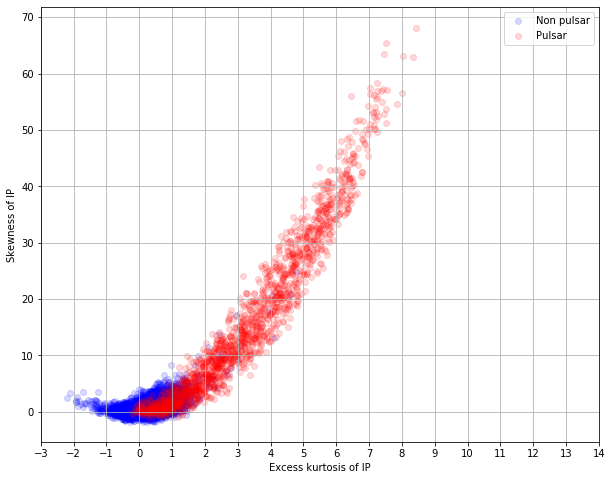

In [38]:
np.random.seed(0)
excess_IP_rnd = data['excess_IP'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(excess_IP_rnd[data['class'] == 0],
            data[data['class'] == 0]['skewness_IP'],
            alpha = 0.15,
            label = 'Non pulsar',
            color = 'b')

plt.scatter(excess_IP_rnd[data['class'] == 1],
            data[data['class'] == 1]['skewness_IP'],
            alpha = 0.15,
            label = 'Pulsar',
            color = 'r')

plt.xlabel('Excess kurtosis of IP')
plt.xticks(range(-3, 15))
plt.xlim(-3, 14)
plt.ylabel('Skewness of IP')
plt.legend()
plt.grid()

In [42]:
data.describe(include = ['float64'])

,mean_IP,deviation_IP,excess_IP,skewness_IP,mean_DM-SNR,deviation_DM-SNR,excess_DM-SNR,skewness_DM-SNR
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [43]:
data.describe(include = 'all')

,mean_IP,deviation_IP,excess_IP,skewness_IP,mean_DM-SNR,deviation_DM-SNR,excess_DM-SNR,skewness_DM-SNR,class
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.00000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419,0.09158
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270,0.28844
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.00000
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119,0.00000
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996,0.00000
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905,0.00000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.00000


In [45]:
data['mean_IP'].unique()

array([102.5078125, 103.015625 , 136.75     , ...,  84.421875 ,
        98.7265625,  57.0625   ])


## Обрабатываем данные

#### Обрабатываем пропущенные значения


In [65]:
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
data[numerical_columns].count(axis = 0)

mean_IP             17897
deviation_IP        17897
excess_IP           17897
skewness_IP         17897
mean_DM-SNR         17897
deviation_DM-SNR    17897
excess_DM-SNR       17897
skewness_DM-SNR     17897
class               17897
dtype: int64

Датасет не содержит пропущеных значений

#### Векторизация не требуется, т.к. в датасете нет категориальных (номинальных) признаков

## Нормализация данных

In [67]:
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
numerical_columns

['mean_IP',
 'deviation_IP',
 'excess_IP',
 'skewness_IP',
 'mean_DM-SNR',
 'deviation_DM-SNR',
 'excess_DM-SNR',
 'skewness_DM-SNR',
 'class']

In [68]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,mean_IP,deviation_IP,excess_IP,skewness_IP,mean_DM-SNR,deviation_DM-SNR,excess_DM-SNR,skewness_DM-SNR,class
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.00000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419,0.09158
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270,0.28844
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.00000
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119,0.00000
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996,0.00000
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905,0.00000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.00000


In [69]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,mean_IP,deviation_IP,excess_IP,skewness_IP,mean_DM-SNR,deviation_DM-SNR,excess_DM-SNR,skewness_DM-SNR,class
count,1.789700e+04,1.789700e+04,1.789700e+04,1.789700e+04,1.789700e+04,1.789700e+04,1.789700e+04,1.789700e+04,1.789700e+04
mean,-1.302218e-16,-5.458995e-15,-1.835810e-15,-4.224269e-16,6.257000e-16,-4.840441e-15,2.229652e-15,5.208873e-16,-3.176142e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.103498e+00,-3.182355e+00,-2.212203e+00,-5.775405e-01,-4.207732e-01,-9.735733e-01,-2.539346e+00,-1.002996e+00,-3.175000e-01
25%,-3.956165e-01,-6.099037e-01,-4.236519e-01,-3.175951e-01,-3.627597e-01,-6.106293e-01,-5.596910e-01,-6.562532e-01,-3.175000e-01
50%,1.559213e-01,5.807565e-02,-2.393256e-01,-2.548096e-01,-3.329445e-01,-4.040329e-01,2.891509e-02,-2.045717e-01,-3.175000e-01
75%,6.240128e-01,6.537833e-01,-4.273821e-03,-1.365439e-01,-2.425911e-01,1.079159e-01,5.324640e-01,3.234357e-01,-3.175000e-01
max,3.178568e+00,7.632557e+00,7.134610e+00,1.075399e+01,7.151381e+00,4.330292e+00,5.822238e+00,1.019686e+01,3.149430e+00


## X и y

In [96]:
X = data.drop('class', axis = 1)
y = data['class']
feature_names = X.columns

In [97]:
type(feature_names)

pandas.core.indexes.base.Index

In [98]:
feature_names

Index(['mean_IP', 'deviation_IP', 'excess_IP', 'skewness_IP', 'mean_DM-SNR',
       'deviation_DM-SNR', 'excess_DM-SNR', 'skewness_DM-SNR'],
      dtype='object')

In [99]:
X = X.to_numpy()
y = y.to_numpy()

In [100]:
print(X.shape)
print(y.shape)
N, d = X.shape

(17897, 8)
(17897,)


In [101]:
type(X)

numpy.ndarray

In [102]:
type(y)

numpy.ndarray

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

12527 5370


## kNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [109]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print('Train error:', err_train, '\nTest error: ', err_test)

Train error: 0.025464995609483516 
Test error:  0.027001862197392923


In [110]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[4830   35]
 [ 110  395]]


### Подбор параметров

In [111]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.027380857348128007 15


In [112]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('Train error:', err_train, '\nTest error: ', err_test)

Train error: 0.02602378861658817 
Test error:  0.026629422718808193
